# Lesson 6 - Starter Code

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model

# above we import the linear model

# read in the mammal dataset
wd = '../dataset/msleep/'
mammals = pd.read_csv(wd+'msleep.csv')
mammals = mammals[mammals.brainwt.notnull()].copy()

# this drops observations that have a nul in the brainwt column
# adding the copy() ensures that the new mammalns variable is now "for ever" without the specified observation


### Explore our mammals dataset

In [8]:
mammals.head()

# note that sleep_total column and awake column are 100% correlated

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800


### Lets check out a scatter plot of body wieght and brain weight

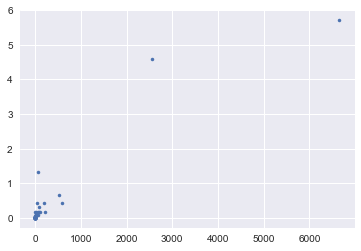

In [9]:
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(mammals.bodywt, mammals.brainwt, '.')
# show the plot
plt.show()

# there are outliers
# assume you want to remove them: see code below

# looking at the graph below it seems clear a log transformation is needed

In [10]:
mammals1 = mammals[mammals.bodywt <=2000]

# this elimnates some of the outliers

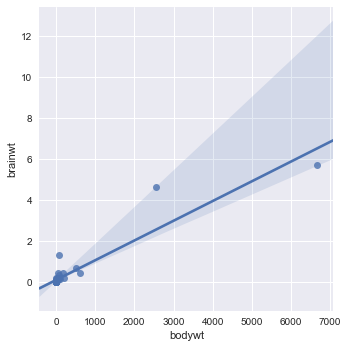

In [8]:
sns.lmplot('bodywt', 'brainwt', mammals)

# this laso gives the best fit line

In [11]:
log_columns = ['bodywt', 'brainwt',]

#log trasformation applies to above columns

log_mammals = mammals.copy()

# copy here ensures that mammals stays unchanged

log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

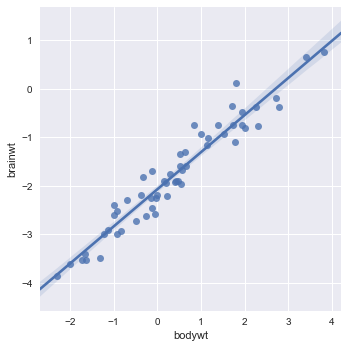

In [10]:
sns.lmplot('bodywt', 'brainwt', log_mammals)

## Guided Practice: Using Seaborn to generate single variable linear model plots (15 mins)
Update and complete the code below to use lmplot and display correlations between body weight and two dependent variables: sleep_rem and awake.


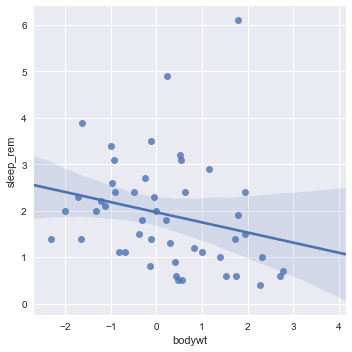

In [15]:
log_columns = ['bodywt', 'brainwt',]  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

sns.lmplot('bodywt', 'sleep_rem', log_mammals)

# the sleep_rem has not been log transformed in the log_mammals dataframe so the scatterplot shows
# the relationship between log-transformed bodywght and regular sleep_rem
# it would be not good to apply log transformation to sleep_rem because it would be an unnecessary
# transformation and that is always a bad idea. So .... always minimize the number of transformation
# unless it truely improves the dataset




##### Complete below for sleep_rem and awake as a y, with variables you've already used as x.


In [16]:
sns.lmplot(x, y, mammals)
sns.lmplot(x, y, log_mammals)

ValueError: all the input arrays must have same number of dimensions

## Introduction: Single Regression Analysis in statsmodels & scikit (10 mins)

In [17]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

X = mammals[['bodywt']]
y = mammals['brainwt']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'

lm = smf.ols(formula='y ~ X', data=mammals).fit()

# print the full summary
# ols stands for ordinary least square regression

lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     367.7
Date:                Mon, 20 Nov 2017   Prob (F-statistic):           9.16e-26
Time:                        19:23:13   Log-Likelihood:                -20.070
No. Observations:                  56   AIC:                             44.14
Df Residuals:                      54   BIC:                             48.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0859      0.048      1.782      0.080      -0.011       0.183
X              0.0010   5.03e-05     19.176      0.000       0.001       0.001
==============================================================================
Omnibus:                       85.068   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.630
Skew:                           4.258   Prob(JB):                    1.14e-289
Kurtosis:                      25.311   Cond. No.                         981.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Use Statsmodels to make the prediction

In [18]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'X': [50]})
X_new.head()

,X
0,50


In [19]:
lm.predict(X_new)

0    0.134115
dtype: float64

### Repeat in Scikit with handy plotting

When modeling with sklearn, you'll use the following base principals:

- All sklearn estimators (modeling classes) are based on this base estimator. This allows you to easily rotate through estimators without changing much code.
- All estimators take a matrix, X, either sparse or dense.
- Many estimators also take a vector, y, when working on a supervised machine learning problem. Regressions are supervised learning because we already have examples of y given X.
- All estimators have parameters that can be set. This allows for customization and higher level of detail to the learning process. The parameters are appropriate to each estimator algorithm.

P Values: [  9.15540205e-26]
Coefficients: [ 0.00096395]
y-intercept: 0.0859173102936
R-Squared: 0.871949198087


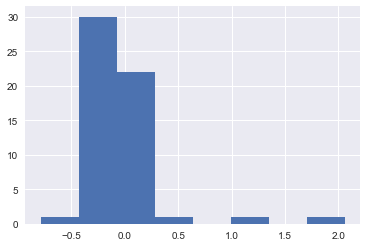

In [20]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values
    
    # the .values changes the values into a  python list which makes it look cleaner

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=int(np.ceil(np.sqrt(len(y)))))
    # keep the model
    return algo

X = mammals[['bodywt']]
y = mammals['brainwt']

# X is a data frame while Y is a series. Needed to make it work in the function below

lm = linear_model.LinearRegression()

# above initialization

lm = get_linear_model_metrics(X, y, lm)

# R squared should be between 0 and 1. If it is negative it means it implies a mistake 
# in your model. R squared reltively high suggest strong relationship betwene brainwgt and 
# bodywgt

# below graph shows the histogram of residual errors. Is clearly not normal distributed. 
# This indicates that some kind of transformation is need. This is no surprise; in the section
# above we already noted that a log transformation is in order!
# the p value in this example indicates the likelyhood that bodywgt is a good predictor for 
# brainwgt

## Demo: Significance is Key (20 mins)

### What does our output tell us?

Our output tells us that:

* The relationship between bodywt and brainwt isn't random (p value approaching 0)  
* The model explains, roughly, 87% of the variance of the dataset (the largest errors being in the large brain and body sizes)  
* With this current model, brainwt is roughly bodywt * 0.00096395  
* The residuals, or error in the prediction, is not normal, with outliers on the right. A better with will have similar to normally distributed error.

### Evaluating Fit, Evaluating Sense

Although we know there is a better solution to the model, we should evaluate some other sense things first. For example, given this model, what is an animal's brainwt if their bodywt is 0?

In [21]:
# prediction at 0?
print lm.predict([[0]])

[ 0.08591731]


P Values: [  9.15540205e-26]
Coefficients: [ 0.00098291]
y-intercept: 0.0
R-Squared: 0.864418807451
[ 0.]


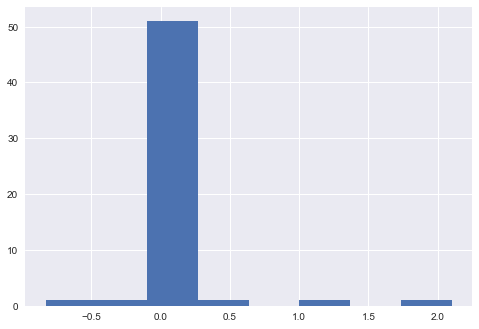

In [18]:
lm = linear_model.LinearRegression(fit_intercept=False)

# this forces that when bodywgt is zero the brainwgt should be zero as well

lm = get_linear_model_metrics(X, y, lm)
# prediction at 0?
print lm.predict([[0]])

## Intrepretation?


Answer:

## Guided Practice: Using the LinearRegression object (15 mins)

We learned earlier that the data in its current state does not allow for the best linear regression fit. 

With a partner, generate two more models using the log-transformed data to see how this transform changes the model's performance. 

Complete the following code to update X and y to match the log-transformed data. 

Complete the loop by setting the list to be one True and one False.

y-intercept: True
P Values: [  3.56282243e-33]
Coefficients: [ 0.76516177]
y-intercept: -2.07393164084
R-Squared: 0.931851615367

y-intercept: False
P Values: [  3.56282243e-33]
Coefficients: [ 0.35561441]
y-intercept: 0.0
R-Squared: -2.41053211437



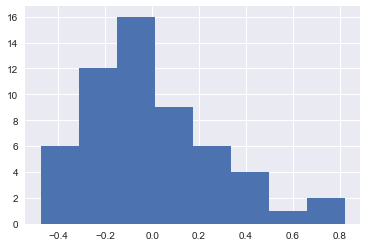

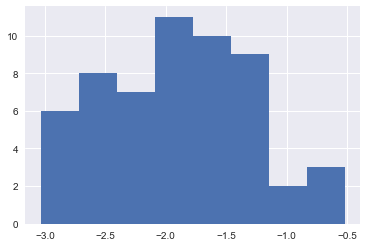

In [22]:
#starter
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']

# True below means there is an actual intercept. False means the intercept is zero. 
# In the case where no intercept, do not look at R squared anymore, you need to look
# at mean squared error so that needs to ne added to the metrics! The model is still 
# relevant

loop = [True,False]
for boolean in loop:
    print 'y-intercept:', boolean
    lm = linear_model.LinearRegression(fit_intercept=boolean)
    get_linear_model_metrics(X, y, lm)
    print

### Which model performed the best? The worst? Why?


Answer: 

### Advanced Methods! 

We will go over different estimators in detail in the future but check it out in the docs if you're curious (and finish a little early)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
P Values: [  3.56282243e-33]
Coefficients: [ 0.23454772]
y-intercept: -1.85931606304
R-Squared: 0.483728109403

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
P Values: [  3.56282243e-33]
Coefficients: [ 0.75797972]
y-intercept: -2.07102674342
R-Squared: 0.931769516561

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
P Values: [  3.56282243e-33]
Coefficients: [ 0.39504621]
y-intercept: -1.9242323166
R-Squared: 0.71382228495



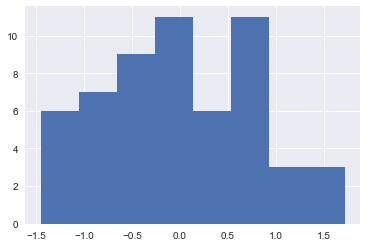

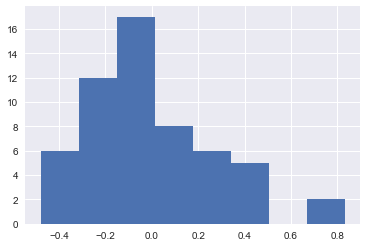

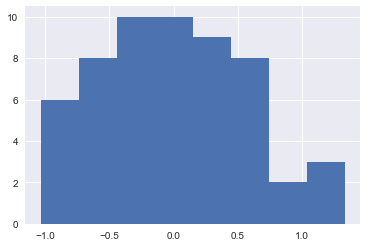

In [23]:
# loading other sklearn regression estimators
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']

estimators = [
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
]

for est in estimators:
    print est
    get_linear_model_metrics(X, y, est)
    print


## Introduction: Multiple Regression Analysis using citi bike data (10 minutes)


In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the Y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.

In [24]:
wd = '../dataset/bikeshare/'
bike_data = pd.read_csv(wd+'bikeshare.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### What is Multicollinearity?

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

            temp     atemp    casual
temp    1.000000  0.987672  0.459616
atemp   0.987672  1.000000  0.454080
casual  0.459616  0.454080  1.000000
Axes(0.125,0.125;0.62x0.755)


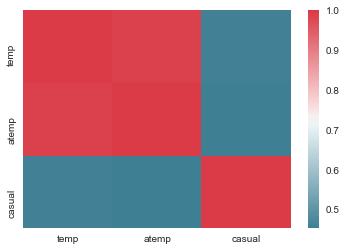

In [25]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = bike_data[['temp', 'atemp', 'casual']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

### What does the correlation matrix explain?

Answer: 

## We can measure this effect in the coefficients:



temp
P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163

atemp
P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733

temp, atemp
P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661



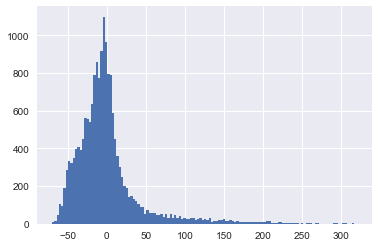

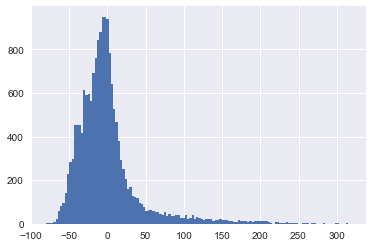

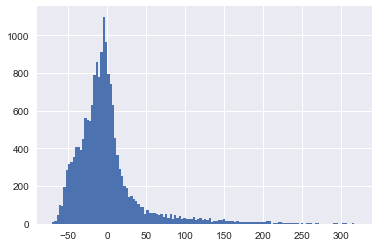

In [26]:
y = bike_data['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

# this creates three models: one with temp as independent variable, one with atemp and one with both

for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print

The above indicates that temp and atemp are highly correlated because the coefficient of one of the variables dropped very low in the "combined model" (to 1.5). Since in the combined model both variables still have a low p, both variables are good predictors but you should throw out one of the variables because of the correlation between the variables. Note: if in the "combined variable model", one of the variables got a high p, you should throw that one out (that would be cofounding variables).

Answer: 

### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?


P Values: [ 0.  0.]
Coefficients: [ 112.02457031  -80.87301833]
y-intercept: 30.7273338581
R-Squared: 0.310901196913


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

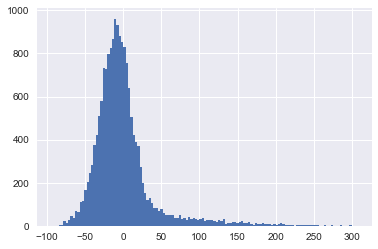

In [27]:
y = bike_data['casual']
x = bike_data[['temp', 'hum']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())


## Guided Practice: Multicollinearity with dummy variables (15 mins)



There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

In [28]:
bike_data.weathersit.unique()

array([1, 2, 3, 4])

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55   2.46181288e-01]
Coefficients: [  2.34550988e+13   2.34550988e+13   2.34550988e+13   2.34550988e+13]
y-intercept: -2.34550987861e+13
R-Squared: 0.0233354007662

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55]
Coefficients: [ 37.87876398  26.92862383  13.38900634]
y-intercept: 2.66666666663
R-Squared: 0.0233906873841


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

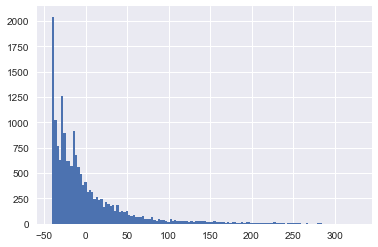

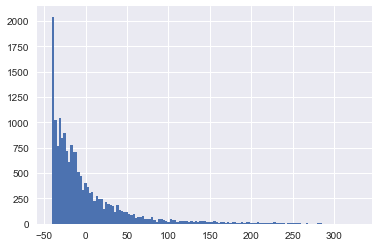

In [34]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)

# get_dummies converts data into binary data
# print weather would show you matrix with 4 columns,  one column per weather type and 
# values in columns would be 0or 1
# as discussed you really only need three columns because you could then determine for column 4
# whether it should be 0 or 1

get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm)
print

# note that above the numbers 1, 2, 3 and 4 refer to the name of the 
# column (which just accidentally are 1, 2 3 and 4 in this example)
# drop the least significant, weather situation  = 4 because previous results clearly make no sense
# if there is perfect correlation, as is the case here, the coefficients becomes HUGE
# clearly if you knlw weather is 1, 2 or 3 you know wether the weather is 4 or not

get_linear_model_metrics(weather[[1, 2, 3]], y, lm)


### Similar in Statsmodels

In [32]:
# all dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     104.0
Date:                Mon, 20 Nov 2017   Prob (F-statistic):           1.13e-87
Time:                        19:42:19   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17374   BIC:                         1.844e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -3.319e+12   5.17e+13     -0.064      0.949   -1.05e+14    9.79e+13
weather[[1, 2, 3, 4]][0]  3.319e+12   5.17e+13      0.064      0.949   -9.79e+13    1.05e+14
weather[[1, 2, 3, 4]][1]  3.319e+12   5.17e+13      0.064      0.949   -9.79e+13    1.05e+14
weather[[1, 2, 3, 4]][2]  3.319e+12   5.17e+13      0.064      0.949   -9.79e+13    1.05e+14
weather[[1, 2, 3, 4]][3]  3.319e+12   5.17e+13      0.064      0.949   -9.79e+13    1.05e+14
==============================================================================
Omnibus:                     8995.399   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58868.810
Skew:                           2.467   Prob(JB):                         0.00
Kurtosis:                      10.547   Cond. No.                     3.88e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
#droping one
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     138.7
Date:                Mon, 20 Nov 2017   Prob (F-statistic):           8.08e-89
Time:                        19:42:25   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17375   BIC:                         1.844e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.6667     28.134      0.095      0.924     -52.478      57.812
weather[[1, 2, 3]][0]    37.8788     28.138      1.346      0.178     -17.274      93.031
weather[[1, 2, 3]][1]    26.9286     28.143      0.957      0.339     -28.235      82.092
weather[[1, 2, 3]][2]    13.3890     28.164      0.475      0.635     -41.814      68.592
==============================================================================
Omnibus:                     9001.632   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58962.554
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      10.553   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What's the interpretation ? Do you want to keep all your dummy variables or drop one? Why? 




Answer:

## Guided Practice: Combining non-correlated features into a better model (15 mins)

In [ ]:
bike_data.dtypes

## With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:

- Add the three significant weather situations into our current model.
- Find two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

In [ ]:
#starter 
lm = linear_model.LinearRegression()
bikemodel_data = bike_data.join() # add in the three weather situations

cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = # what are we getting the correlations of?
print correlations
print sns.heatmap(correlations, cmap=cmap)

columns_to_keep = [] #[which_variables?]
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, y, lm)

In [ ]:
#sklearn
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, np.log10(y+1), lm)

In [ ]:
#Stats models
log_y = np.log10(y+1)
lm = smf.ols(formula=' log_y ~ temp + hum + windspeed + weather_1 + weather_2 + weather_3 + holiday + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=bikemodel_data).fit()
#print the full summary
lm.summary()

## Independent Practice: Building models for other y variables (25 minutes)

We've completely a model together that explains casual guest riders. Now it's your turn to build another model, using a different y variable: registered riders.

#### Pay attention to:

* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and registered riders  
* having a feature space (our matrix) with low multicollinearity  
* model complexity vs explanation of variance: at what point do features in a model stop improving r-squared?  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?

#### Bonus

* Which variables would make sense to dummy (because they are categorical, not continuous)?  
* What features might explain ridership but aren't included in the data set? 
* Is there a way to build these using pandas and the features available?
* Outcomes If your model at least improves upon the original model and the explanatory effects (coefficients) make sense, consider this a complete task. 

### If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos!